In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from datetime import datetime

In [2]:
# Data Generator Configuration
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [3]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)

In [4]:
train_data_dir = r'C:\Users\User\FYP\Tensorflow Sign Language Recognition\TFODCourse\Tensorflow\workspace\images\train'
validation_data_dir = r'C:\Users\User\FYP\Tensorflow Sign Language Recognition\TFODCourse\Tensorflow\workspace\images\test'

In [5]:
# Data Generator Configuration
num_batch_size = 32  # Define the batch size here

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(38, 38),
    batch_size=num_batch_size,
    class_mode='categorical'
)

Found 1599 images belonging to 4 classes.


In [7]:
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(38, 38),
    batch_size=num_batch_size,
    class_mode='categorical'
)

Found 400 images belonging to 4 classes.


In [8]:
# Model Configuration
model = Sequential()

In [9]:
# First Layer
model.add(Conv2D(32, (3, 3), input_shape=(38, 38, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [10]:
# Second Layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [11]:
# Third Layer
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

In [13]:
# Final Layer
model.add(Dense(4, activation='softmax'))
model.add(Activation('softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 36, 36, 32)        896       
                                                                 
 activation (Activation)     (None, 36, 36, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 18, 18, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                   

In [15]:
# Compile the model
adam = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [16]:
# Training my model
from tensorflow.keras.callbacks import ModelCheckpoint

In [17]:
# Training
num_epochs = 10
start = datetime.now()

In [18]:
start = datetime.now()

In [19]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [20]:
# Create lists to store training and validation accuracy
training_accuracy = []
validation_accuracy = []

In [21]:
for epoch in range(num_epochs):
    # Train the model for one epoch
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // num_batch_size,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // num_batch_size,
        epochs=1,  # Train for one epoch at a time
        callbacks=[es],
    )

49/49 [==============================] - 17s 347ms/step - loss: 0.8837 - accuracy: 0.8666 - val_loss: 0.8303 - val_accuracy: 0.9115


In [22]:
# Store the training and validation accuracy for this epoch
training_accuracy.append(history.history['accuracy'][0])
validation_accuracy.append(history.history['val_accuracy'][0])

In [23]:
# Calculate the total training duration
duration = datetime.now() - start

In [24]:
print("Training completed in time:", duration)

Training completed in time: 0:04:07.481992


In [25]:
print("Training accuracy:", training_accuracy)
print("Validation accuracy:", validation_accuracy)

Training accuracy: [0.866624116897583]
Validation accuracy: [0.9114583134651184]


In [26]:
# Training
num_epochs = 50
start = datetime.now()

In [27]:
for epoch in range(num_epochs):
    # Train the model for one epoch
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // num_batch_size,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // num_batch_size,
        epochs=1,  # Train for one epoch at a time
        callbacks=[es],
    )

49/49 [==============================] - 16s 326ms/step - loss: 0.7694 - accuracy: 0.9764 - val_loss: 0.7571 - val_accuracy: 0.9844


In [28]:
# Store the training and validation accuracy for this epoch
training_accuracy.append(history.history['accuracy'][0])
validation_accuracy.append(history.history['val_accuracy'][0])

In [29]:
# Calculate the total training duration
duration = datetime.now() - start

In [30]:
print("Training completed in time:", duration)

Training completed in time: 0:14:43.727956


In [31]:
print("Training accuracy:", training_accuracy)
print("Validation accuracy:", validation_accuracy)

Training accuracy: [0.866624116897583, 0.9763879776000977]
Validation accuracy: [0.9114583134651184, 0.984375]


In [32]:
# Training
num_epochs = 100
start = datetime.now()

In [33]:
for epoch in range(num_epochs):
    # Train the model for one epoch
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // num_batch_size,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // num_batch_size,
        epochs=1,  # Train for one epoch at a time
        callbacks=[es],
    )

49/49 [==============================] - 12s 250ms/step - loss: 0.7596 - accuracy: 0.9834 - val_loss: 0.7580 - val_accuracy: 0.9818


In [34]:
# Store the training and validation accuracy for this epoch
training_accuracy.append(history.history['accuracy'][0])
validation_accuracy.append(history.history['val_accuracy'][0])

In [35]:
# Calculate the total training duration
duration = datetime.now() - start

In [36]:
print("Training completed in time:", duration)

Training completed in time: 0:31:49.941870


In [37]:
print("Training accuracy:", training_accuracy)
print("Validation accuracy:", validation_accuracy)

Training accuracy: [0.866624116897583, 0.9763879776000977, 0.9834077954292297]
Validation accuracy: [0.9114583134651184, 0.984375, 0.9817708134651184]


In [38]:
model.save('model.h5')

C:\Users\User\FYP\Tensorflow Sign Language Recognition\TFODCourse\tfod\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [1]:
from tensorflow.keras.models import load_model

In [2]:
loaded_model = load_model (r'C:\Users\User\FYP\Tensorflow Sign Language Recognition\TFODCourse\model.h5')

In [3]:
import os
import numpy as np
from tensorflow.keras.models import load_model
import cv2

In [4]:
signs = ['hello', 'iloveyou', 'no', 'yes']

In [5]:
def predict_sign(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (38, 38))  # Resize the image to match the model's input size
    img = np.reshape(img, [1, 38, 38, 3])
    img = img / 255.0
    prediction = loaded_model.predict(img)
    predicted_class = np.argmax(prediction)
    sign_label = signs[predicted_class]
    return sign_label

# Example image path for prediction
image_path = r'C:\Users\User\FYP\Tensorflow Sign Language Recognition\TFODCourse\Tensorflow\workspace\images\test\hello\hello (30).jpg'  # Replace this with your image path
predicted_sign = predict_sign(image_path)
print("Predicted Sign:", predicted_sign)

1/1 [==============================] - 1s 682ms/step
Predicted Sign: hello


1/1 [==============================] - 0s 25ms/step


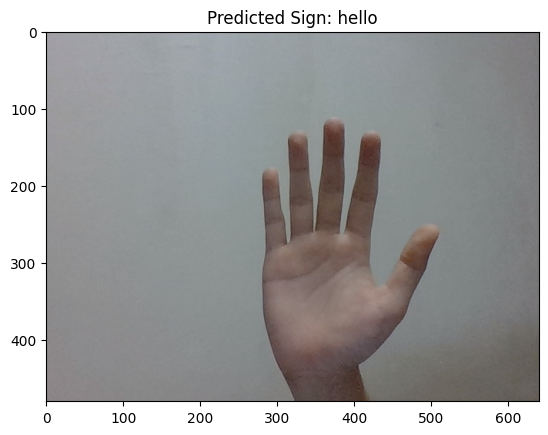

Predicted Sign: hello


In [6]:
import cv2
import matplotlib.pyplot as plt

def predict_sign(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (38, 38))  # Resize the image to match the model's input size
    img = np.reshape(img, [1, 38, 38, 3])
    img = img / 255.0
    prediction = loaded_model.predict(img)
    predicted_class = np.argmax(prediction)
    sign_label = signs[predicted_class]

    return sign_label

# Example image path for prediction
image_path = r'C:\Users\User\FYP\Tensorflow Sign Language Recognition\TFODCourse\Tensorflow\workspace\images\test\hello\hello (30).jpg'  # Replace this with your image path
predicted_sign = predict_sign(image_path)

# Display the image after sign_label is assigned
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
plt.title(f'Predicted Sign: {predicted_sign}')
plt.show()

print("Predicted Sign:", predicted_sign)

In [7]:
def predict_sign(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (38, 38))  # Resize the image to match the model's input size
    img = np.reshape(img, [1, 38, 38, 3])
    img = img / 255.0
    prediction = loaded_model.predict(img)
    predicted_class = np.argmax(prediction)
    sign_label = signs[predicted_class]
    return sign_label

# Example image path for prediction
image_path = r'C:\Users\User\FYP\Tensorflow Sign Language Recognition\TFODCourse\Tensorflow\workspace\images\test\iloveyou\iloveyou (30).jpg'  # Replace this with your image path
predicted_sign = predict_sign(image_path)
print("Predicted Sign:", predicted_sign)

1/1 [==============================] - 0s 46ms/step
Predicted Sign: iloveyou


1/1 [==============================] - 0s 48ms/step


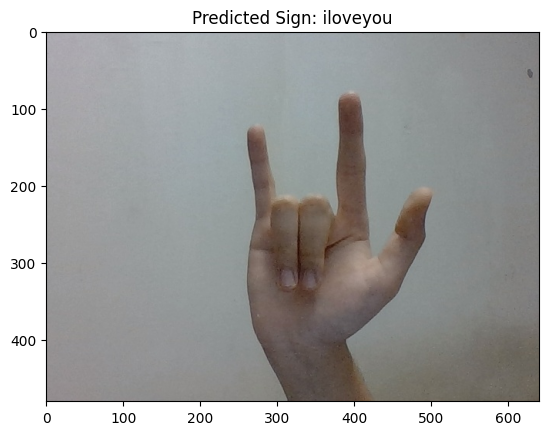

Predicted Sign: iloveyou


In [8]:
import cv2
import matplotlib.pyplot as plt

def predict_sign(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (38, 38))  # Resize the image to match the model's input size
    img = np.reshape(img, [1, 38, 38, 3])
    img = img / 255.0
    prediction = loaded_model.predict(img)
    predicted_class = np.argmax(prediction)
    sign_label = signs[predicted_class]

    return sign_label

# Example image path for prediction
image_path = r'C:\Users\User\FYP\Tensorflow Sign Language Recognition\TFODCourse\Tensorflow\workspace\images\test\iloveyou\iloveyou (30).jpg'  # Replace this with your image path
predicted_sign = predict_sign(image_path)

# Display the image after sign_label is assigned
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
plt.title(f'Predicted Sign: {predicted_sign}')
plt.show()

print("Predicted Sign:", predicted_sign)

In [9]:
def predict_sign(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (38, 38))  # Resize the image to match the model's input size
    img = np.reshape(img, [1, 38, 38, 3])
    img = img / 255.0
    prediction = loaded_model.predict(img)
    predicted_class = np.argmax(prediction)
    sign_label = signs[predicted_class]
    return sign_label

# Example image path for prediction
image_path = r'C:\Users\User\FYP\Tensorflow Sign Language Recognition\TFODCourse\Tensorflow\workspace\images\test\no\no (40).jpg'  # Replace this with your image path
predicted_sign = predict_sign(image_path)
print("Predicted Sign:", predicted_sign)

1/1 [==============================] - 0s 60ms/step
Predicted Sign: no


1/1 [==============================] - 0s 67ms/step


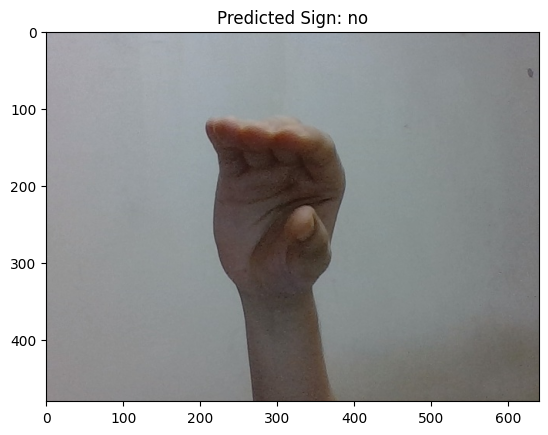

Predicted Sign: no


In [10]:
import cv2
import matplotlib.pyplot as plt

def predict_sign(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (38, 38))  # Resize the image to match the model's input size
    img = np.reshape(img, [1, 38, 38, 3])
    img = img / 255.0
    prediction = loaded_model.predict(img)
    predicted_class = np.argmax(prediction)
    sign_label = signs[predicted_class]

    return sign_label

# Example image path for prediction
image_path = r'C:\Users\User\FYP\Tensorflow Sign Language Recognition\TFODCourse\Tensorflow\workspace\images\test\no\no (40).jpg'  # Replace this with your image path
predicted_sign = predict_sign(image_path)

# Display the image after sign_label is assigned
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
plt.title(f'Predicted Sign: {predicted_sign}')
plt.show()

print("Predicted Sign:", predicted_sign)

In [11]:
def predict_sign(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (38, 38))  # Resize the image to match the model's input size
    img = np.reshape(img, [1, 38, 38, 3])
    img = img / 255.0
    prediction = loaded_model.predict(img)
    predicted_class = np.argmax(prediction)
    sign_label = signs[predicted_class]
    return sign_label

# Example image path for prediction
image_path = r'C:\Users\User\FYP\Tensorflow Sign Language Recognition\TFODCourse\Tensorflow\workspace\images\test\yes\yes (29).jpg'  # Replace this with your image path
predicted_sign = predict_sign(image_path)
print("Predicted Sign:", predicted_sign)

1/1 [==============================] - 0s 47ms/step
Predicted Sign: yes


1/1 [==============================] - 0s 63ms/step


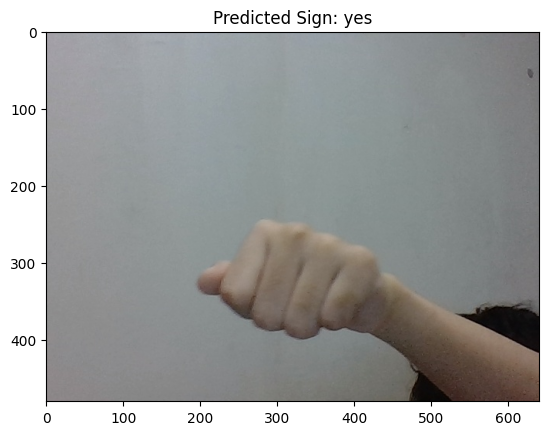

Predicted Sign: yes


In [12]:
import cv2
import matplotlib.pyplot as plt

def predict_sign(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (38, 38))  # Resize the image to match the model's input size
    img = np.reshape(img, [1, 38, 38, 3])
    img = img / 255.0
    prediction = loaded_model.predict(img)
    predicted_class = np.argmax(prediction)
    sign_label = signs[predicted_class]

    return sign_label

# Example image path for prediction
image_path = r'C:\Users\User\FYP\Tensorflow Sign Language Recognition\TFODCourse\Tensorflow\workspace\images\test\yes\yes (29).jpg'  # Replace this with your image path
predicted_sign = predict_sign(image_path)

# Display the image after sign_label is assigned
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
plt.title(f'Predicted Sign: {predicted_sign}')
plt.show()

print("Predicted Sign:", predicted_sign)

In [16]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import mediapipe as mp

# Load pre-trained model
model = load_model('model.h5')

# Initialize the webcam
cap = cv2.VideoCapture(0)

# Initialize MediaPipe Hand module
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

# Adjust this threshold based on your requirements
min_confidence = 0.5

# Define the signs for classification
signs = ['hello', 'iloveyou', 'no', 'yes']

# Inside the process_frame function
def process_frame(frame):
    # Convert BGR image to RGB
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the hand landmarks using MediaPipe
    results = hands.process(rgb_frame)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            # Extract hand region based on landmarks
            x, y, w, h = get_hand_region(frame, hand_landmarks)

            # Check if the ROI is valid
            if w > 0 and h > 0:
                # Draw bounding box around the hand
                cv2.rectangle(frame, (x, y), (x + w, y + h), (100, 0, 0), 2)

                # Resize the original frame to match the model's input size (38x38)
                roi = frame[y:y + h, x:x + w]

                # Ensure the ROI has a valid size before resizing
                if roi.shape[0] > 0 and roi.shape[1] > 0:
                    roi = cv2.resize(roi, (38, 38), interpolation=cv2.INTER_AREA)

                    # Enhance contrast using histogram equalization
                    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
                    roi = cv2.equalizeHist(roi)
                    roi = cv2.cvtColor(roi, cv2.COLOR_GRAY2BGR)

                    # Ensure the correct input shape for the model
                    roi = roi.reshape((1, 38, 38, 3))  # Reshape to (1, 38, 38, 3)
                    roi = roi.astype('float') / 255.0
                    preds = model.predict(roi)

                    # Check the shape of preds
                    print("Shape of preds:", preds.shape)

                    # Ensure that there are predictions and the shape is as expected
                    if preds.shape[1] == len(signs):
                        sign_label = signs[np.argmax(preds)]

                        # Draw sign label on the frame
                        font = cv2.FONT_HERSHEY_SIMPLEX
                        color = (0, 0, 0)  # BGR color for the text (in this case, green)
                        thickness = 2  # Thickness of the line
                        cv2.putText(frame, sign_label, (x, y - 10), font, 1, color, thickness, cv2.LINE_AA)

                        # Check for 'yes' sign
                        if sign_label == 'yes':
                            # Add your code here for handling 'yes' detection
                            pass

    return frame

def get_hand_region(frame, landmarks):
    # Initialize bounding box coordinates
    x_min, y_min, x_max, y_max = float('inf'), float('inf'), 0, 0

    for landmark in landmarks.landmark:
        x, y = int(landmark.x * frame.shape[1]), int(landmark.y * frame.shape[0])
        x_min = min(x_min, x)
        y_min = min(y_min, y)
        x_max = max(x_max, x)
        y_max = max(y_max, y)

    # Expand the bounding box to ensure the whole hand is captured
    x_min, y_min, x_max, y_max = x_min - 30, y_min - 30, x_max + 30, y_max + 30

    return x_min, y_min, x_max - x_min, y_max - y_min

# Process the video stream
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Process the frame
    frame = process_frame(frame)

    # Display the resulting frame
    cv2.imshow('Sign Language Recognition', frame)

    # Break the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and destroy all windows
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 240ms/step
Shape of preds: (1, 4)
1/1 [==============================] - 0s 54ms/step
Shape of preds: (1, 4)
1/1 [==============================] - 0s 52ms/step
Shape of preds: (1, 4)
1/1 [==============================] - 0s 52ms/step
Shape of preds: (1, 4)
1/1 [==============================] - 0s 52ms/step
Shape of preds: (1, 4)
1/1 [==============================] - 0s 48ms/step
Shape of preds: (1, 4)
1/1 [==============================] - 0s 47ms/step
Shape of preds: (1, 4)
1/1 [==============================] - 0s 44ms/step
Shape of preds: (1, 4)
1/1 [==============================] - 0s 53ms/step
Shape of preds: (1, 4)
1/1 [==============================] - 0s 43ms/step
Shape of preds: (1, 4)
1/1 [==============================] - 0s 45ms/step
Shape of preds: (1, 4)
1/1 [==============================] - 0s 42ms/step
Shape of preds: (1, 4)
1/1 [==============================] - 0s 48ms/step
Shape of preds: (1, 4)
1/1 [===================